# **Dataset Upload**

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para as medidas de avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#Para a divisão dos dados
from sklearn.model_selection import train_test_split

#Para o critério - Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Para o critério - KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

#Para o critério - Clustering
import plotly.express as px

#Para o critério - Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Ligação ao Google Drive 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Universidade/[AC] Aprendizagem Computacional/dataset2_projeto.csv')

# **Dataset Cleaning**

In [ ]:
dataClean = data

In [ ]:
#COURSE
dataClean['Course'] = dataClean['Course'].replace([10], 3)
dataClean['Course'] = dataClean['Course'].replace([17], 9)

#PREVIOUS QUALIFICATION
dataClean['Previous qualification'] = dataClean['Previous qualification'].replace([15], 2)
dataClean['Previous qualification'] = dataClean['Previous qualification'].replace([17], 4)

#MOTHER'S QUALIFICATION
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([19], 1)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([30], 2)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([33], 4)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([34], 5)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([13, 22, 23], 9)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([9, 11], 10)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([31, 32], 11)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([29], 13)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([27], 22)
dataClean["Mother's qualification"] = dataClean["Mother's qualification"].replace([28], 23)

#FATHER'S QUALIFICATION
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([19], 1)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([30], 2)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([33], 4)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([34], 5)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([13, 22, 23], 9)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([9, 11], 10)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([31, 32], 11)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([29], 13)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([27], 22)
dataClean["Father's qualification"] = dataClean["Father's qualification"].replace([28], 23)

#MOTHER'S OCCUPATION
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([19], 3)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([23, 25], 4)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([29], 5)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([30, 32, 33], 6)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([34, 35, 43], 7)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([36, 37, 43], 8)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([40, 41], 9)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([14, 15, 16], 11)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([38], 14)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([39], 15)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([42], 16)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([31, 46], 19)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([24], 20)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([28], 22)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([26], 23)
dataClean["Mother's occupation"] = dataClean["Mother's occupation"].replace([27], 24)

#Father'S OCCUPATION
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([19], 3)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([23, 25], 4)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([29], 5)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([30, 32, 33], 6)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([34, 35, 43], 7)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([36, 37, 43], 8)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([40, 41], 9)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([14, 15, 16], 11)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([38], 14)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([39], 15)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([42], 16)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([31, 46], 19)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([24], 20)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([28], 22)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([26], 23)
dataClean["Father's occupation"] = dataClean["Father's occupation"].replace([27], 24)

# **Análise dos dados**

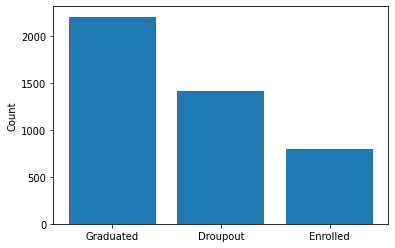

In [ ]:
#Número de alunos em cada categoria do 'Target'
plt.bar(['Graduated', 'Droupout', 'Enrolled'], dataClean['Target'].value_counts())
plt.ylabel('Count')
plt.show()

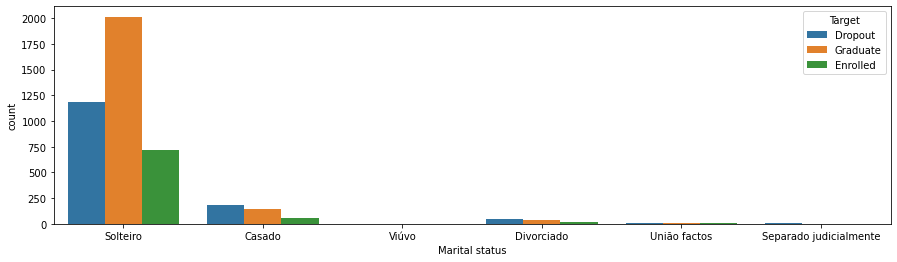

In [ ]:
#Estado civil
plt.figure(figsize=(15,4))
sns.countplot(data=dataClean, x='Marital status', hue='Target')
plt.xticks(ticks=range(6), labels=['Solteiro', 'Casado', 'Viúvo', 'Divorciado', 'União factos', 'Separado judicialmente'])
plt.show()

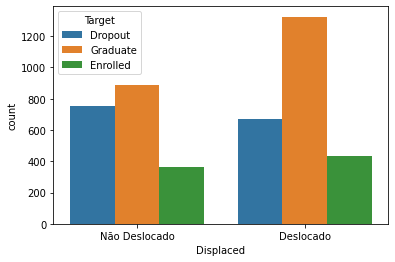

In [ ]:
#Deslocado
sns.countplot(data=dataClean, x='Displaced', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Não Deslocado', 'Deslocado'])
plt.show()

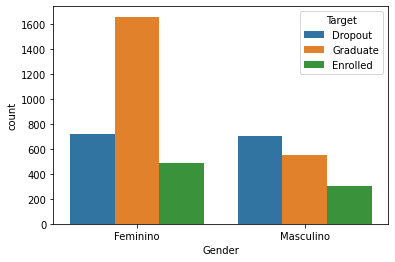

In [ ]:
#Género
sns.countplot(data=dataClean, x='Gender', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'])
plt.show()

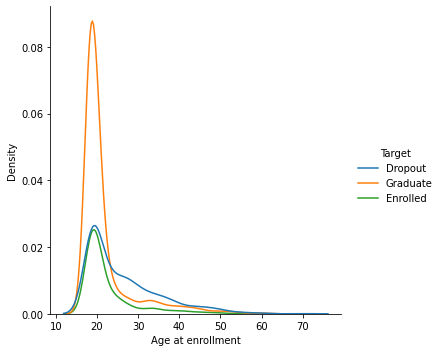

In [ ]:
#Idade no momento de inscrição
sns.displot(data=dataClean, x='Age at enrollment', hue='Target', kind='kde')
plt.show()

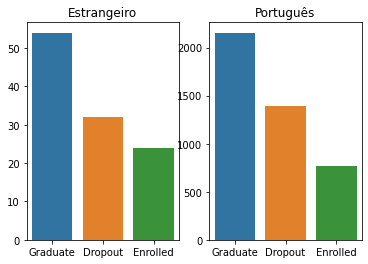

In [ ]:
#Internacional
plt.subplot(1, 2, 1)
sns.countplot(data=dataClean[dataClean["International"] == 1], x = "Target", order = dataClean['Target'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Estrangeiro')

plt.subplot(1, 2, 2)
sns.countplot(data=dataClean[dataClean["International"] == 0], x = "Target", order = dataClean['Target'].value_counts().index)
plt.xlabel('')
plt.ylabel('')
plt.title('Português')

plt.show()

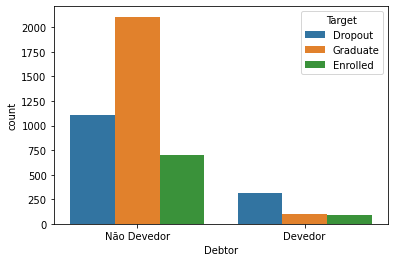

In [ ]:
#Devedor
sns.countplot(data=dataClean, x='Debtor', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Não Devedor', 'Devedor'])
plt.show()

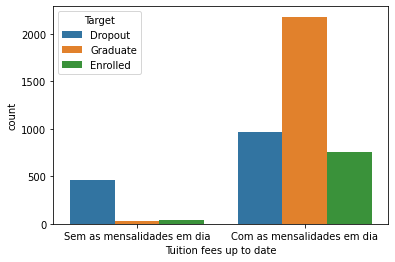

In [ ]:
#Mensalidades em dia
sns.countplot(data=dataClean, x='Tuition fees up to date', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Sem as mensalidades em dia', 'Com as mensalidades em dia'])
plt.show()

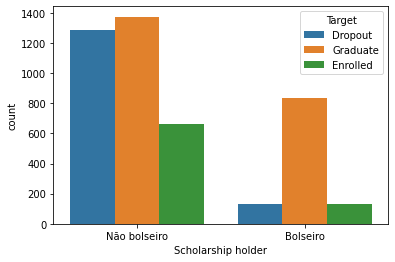

In [ ]:
#Bolseiro
sns.countplot(data=dataClean, x='Scholarship holder', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Não bolseiro', 'Bolseiro'])
plt.show()

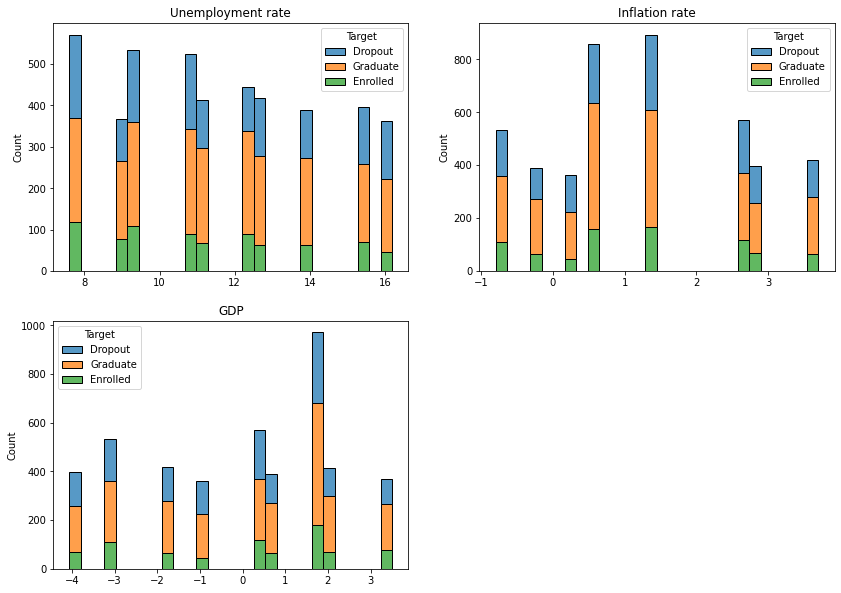

In [ ]:
#Taxa de desemprego, Taxa de inflação, PIB
num_features = ["Unemployment rate", "Inflation rate", "GDP"]

fig = plt.figure(figsize=(14, 21))
for i, feature in enumerate(num_features):
    ax = plt.subplot(4, 2, i+1)
    sns.histplot(data=dataClean, x=feature, hue='Target', multiple = 'stack', bins=28,  ax=ax)
    plt.xlabel('')
    plt.title(feature)

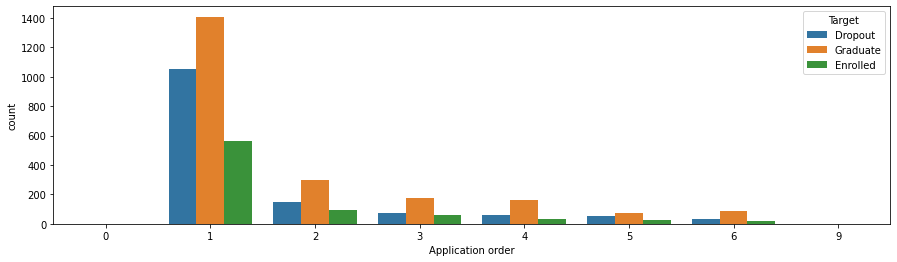

In [ ]:
#Ordem de candidatura
plt.figure(figsize=(15,4))
sns.countplot(data=dataClean, x='Application order', hue='Target')
plt.show()

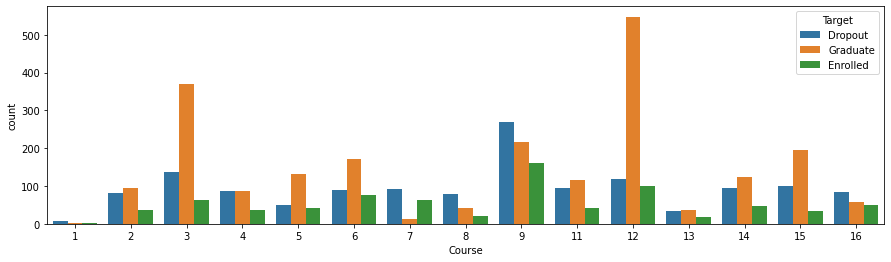

In [ ]:
#Curso
plt.figure(figsize=(15,4))
sns.countplot(data=dataClean, x='Course', hue='Target')
plt.show()

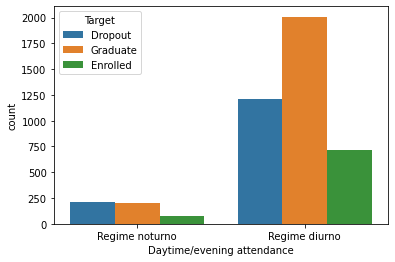

In [ ]:
#Presença diurna/noturna
sns.countplot(data=dataClean, x='Daytime/evening attendance', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Regime noturno', 'Regime diurno'])
plt.show()

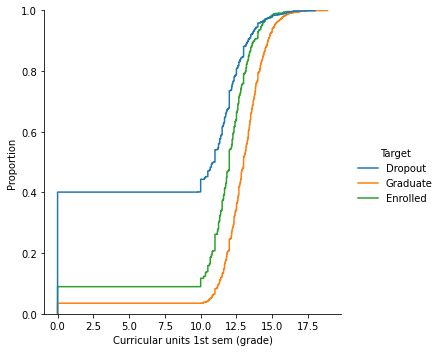

In [ ]:
#Unidades curriculares 1º sem (nota)
sns.displot(data=dataClean, x='Curricular units 1st sem (grade)', hue='Target', kind='ecdf')
plt.show()

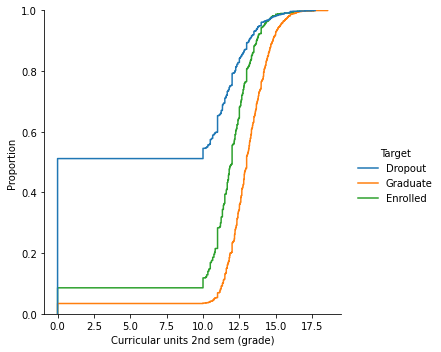

In [ ]:
#Unidades curriculares 2º sem (nota)
sns.displot(data=dataClean, x='Curricular units 2nd sem (grade)', hue='Target', kind='ecdf')
plt.show()

# **Construção dos modelos**

**Criar nova divisão dos dados em dados de Treino e de Teste**

In [ ]:
#Dividir os dados de modo a criar X e Y (features e target)
dataX=dataClean.drop('Target',axis=1)
dataY=dataClean['Target']

In [ ]:
#Dividir os dados em dados de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.3)

In [ ]:
#Guardar os dados de treino e de teste
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# Y_train.to_csv('Y_train.csv', index=False)
# Y_test.to_csv('Y_test.csv', index=False)

**Utilizar códigos de treino e de teste previamente criados**

In [ ]:
#Importar os dados de Treino e de Teste
X_train = pd.read_csv('/content/drive/MyDrive/Universidade/[AC] Aprendizagem Computacional/Projeto/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Universidade/[AC] Aprendizagem Computacional/Projeto/X_test.csv')
Y_train = pd.read_csv('/content/drive/MyDrive/Universidade/[AC] Aprendizagem Computacional/Projeto/Y_train.csv')
Y_test = pd.read_csv('/content/drive/MyDrive/Universidade/[AC] Aprendizagem Computacional/Projeto/Y_test.csv')

# DECISION TREES

In [ ]:
#Criar o classificador árvore de decisão
dtc = DecisionTreeClassifier()

#Treinar o modelo
dtc = dtc.fit(X_train, Y_train)
Y_test_pred = dtc.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y_test_pred))

Accuracy: 0.6762048192771084


In [ ]:
#MELHORAMENTO - MANUAL
dtc = DecisionTreeClassifier(criterion="entropy", splitter='best', max_depth=5, min_samples_split=5, min_samples_leaf=10)

dtc = dtc.fit(X_train,Y_train)
Y_test_pred = dtc.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y_test_pred))

Accuracy: 0.7341867469879518


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'criterion': ("gini", "entropy", "log_loss"), 
              'splitter':("best", "random"),
              'min_samples_split': [2, 5, 10, 15, 25, 30, 50, 85],
              'min_samples_leaf': [1, 5, 10, 25], 
              'max_depth': [500, 1000]}

dtc = DecisionTreeClassifier()
dtc = GridSearchCV(dtc, param_grid)
dtc = dtc.fit(X_train,Y_train)
Y_test_pred = dtc.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y_test_pred))
print(dtc.best_estimator_)

Accuracy: 0.766566265060241
DecisionTreeClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=25,
                       min_samples_split=10, splitter='random')


**Medidas de Avaliação**

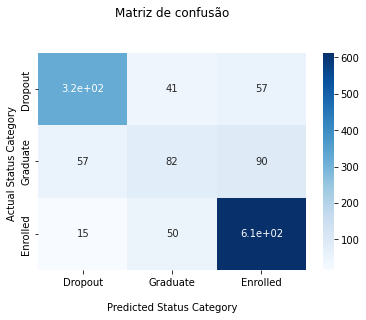

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Dropout','Graduate', 'Enrolled'])
ax.yaxis.set_ticklabels(['Dropout','Graduate', 'Enrolled'])
plt.show()

In [ ]:
#Accuracy
print('Test data accuracy: ', accuracy_score(Y_test, Y_test_pred))

Test data accuracy:  0.766566265060241


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Y_test, Y_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

     Dropout       0.82      0.77      0.79       421
    Enrolled       0.47      0.36      0.41       229
    Graduate       0.81      0.90      0.85       678

    accuracy                           0.77      1328
   macro avg       0.70      0.68      0.68      1328
weighted avg       0.75      0.77      0.76      1328



In [ ]:
#Dados mal classificados
print('Misclassified samples:', (Y_test != Y_test_pred).sum())

Misclassified samples: 310


# KNN - K-Nearst Neighbours

In [ ]:
#Criar o classificador KNN
knn = KNN()

#Treinar o modelo
knn.fit(X_train,Y_train)
Y2_test_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y2_test_pred))

Accuracy: 0.6882530120481928


In [ ]:
#MELHORAMENTO - MANUAL
knn = KNN(n_neighbors=10)
knn.fit(X_train,Y_train)
Y2_test_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y2_test_pred))

Accuracy: 0.7025602409638554


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'n_neighbors': [1, 5, 10, 15, 20],
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': [15, 30, 45, 60, 80], 
              'p': [1, 2, 5]}

knn = KNN()
knn = GridSearchCV(knn, param_grid)
knn.fit(X_train,Y_train)
Y2_test_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y2_test_pred))
print(knn.best_estimator_)

Accuracy: 0.7146084337349398
KNeighborsClassifier(algorithm='kd_tree', leaf_size=45, n_neighbors=15, p=1)


**Medidas de Avaliação**

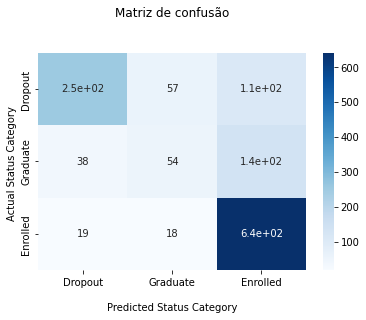

In [ ]:
#Matriz de confusão
model_matrix = confusion_matrix(Y_test, Y2_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Dropout','Graduate', 'Enrolled'])
ax.yaxis.set_ticklabels(['Dropout','Graduate', 'Enrolled'])
plt.show()

In [ ]:
#Accuracy
print('Test data accuracy: ', accuracy_score(Y_test, Y2_test_pred))

Test data accuracy:  0.7146084337349398


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Y_test, Y2_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

     Dropout       0.82      0.60      0.69       421
    Enrolled       0.42      0.24      0.30       229
    Graduate       0.72      0.95      0.82       678

    accuracy                           0.71      1328
   macro avg       0.65      0.59      0.60      1328
weighted avg       0.70      0.71      0.69      1328



In [ ]:
#Dados mal classificados
print('Misclassified samples:', (Y_test != Y2_test_pred).sum())

Misclassified samples: 379


# NAIVE BAYES

In [ ]:
#Criar o classificador GausianNB
gnb = GaussianNB()

#Treinar o modelo
gnb.fit(X_train, Y_train)
Y3_test_pred = gnb.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y3_test_pred))

Accuracy: 0.6867469879518072


In [ ]:
#MELHORAMENTO - COM GRIDSEARCH
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()
gnb = GridSearchCV(gnb, param_grid)
gnb.fit(X_train,Y_train)
Y3_test_pred = gnb.predict(X_test)

print('Accuracy:', accuracy_score(Y_test, Y3_test_pred))
print(gnb.best_estimator_)

Accuracy: 0.6957831325301205
GaussianNB(var_smoothing=0.0005336699231206307)


**Medidas de Avaliação**

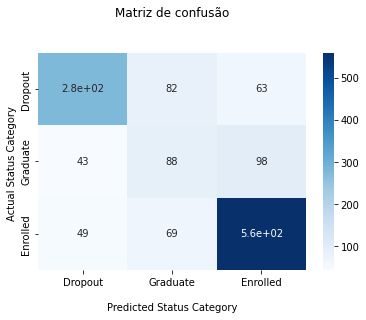

In [ ]:
#Confusion matrix
model_matrix = confusion_matrix(Y_test, Y3_test_pred)
ax = sns.heatmap(model_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusão\n\n');
ax.set_xlabel('\nPredicted Status Category')
ax.set_ylabel('Actual Status Category ');
ax.xaxis.set_ticklabels(['Dropout','Graduate', 'Enrolled'])
ax.yaxis.set_ticklabels(['Dropout','Graduate', 'Enrolled'])
plt.show()

In [ ]:
#Accuracy
print('Test data accuracy: ', accuracy_score(Y_test, Y3_test_pred))

Test data accuracy:  0.6957831325301205


In [ ]:
#Classification report
print('CLASSIFICATION REPORT: \n', classification_report(Y_test, Y3_test_pred))

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

     Dropout       0.75      0.66      0.70       421
    Enrolled       0.37      0.38      0.38       229
    Graduate       0.78      0.83      0.80       678

    accuracy                           0.70      1328
   macro avg       0.63      0.62      0.63      1328
weighted avg       0.70      0.70      0.70      1328



In [ ]:
#Dados mal classificados
print('Misclassified samples:', (Y_test != Y3_test_pred).sum())

Misclassified samples: 404


# CLUSTERING

In [ ]:
#Vamos deixar apenas os atributos relativos ao 1º semestre
tab = dataX.drop(['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 
                  "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
                  'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 
                  'Unemployment rate', 'Inflation rate', 'GDP', 
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                  'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'],axis=1)

fig = px.scatter_matrix(tab, color =dataY,
                        labels={col:col.replace('Curricular units', ' ') for col in tab.columns}, 
                        width=1500, height=1500)
fig.show()

In [ ]:
#Vamos deixar apenas os atributos: Curso e Idade no momento de inscrição
tab = dataX.drop(['Marital status', 'Application mode', 'Application order', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 
                  "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
                  'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 
                  'Unemployment rate', 'Inflation rate', 'GDP', 
                  'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                  'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                  'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                  'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)'],axis=1)

fig = px.scatter_matrix(tab, color =dataY)
fig.show()

Juntar os dados 'Graduate' e 'Enrolled', para ver se assim existe algum padrão de clustering

In [ ]:
#Graduate = Graduate + Enrolled
dataBinario = dataY
dataBinario = dataBinario.replace(['Enrolled'], 'Graduate')

In [ ]:
fig = px.scatter_matrix(tab, color=dataBinario)
fig.show()